In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as mlt
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.preprocessing import MinMaxScaler

In [4]:
def plot_full_dataset(real_dataset, gen_dataset, startindex, endindex, path, col, model):
    tr = real_dataset[startindex:endindex, col]
    te = gen_dataset[startindex:endindex, col]
    mlt.figure(figsize=(20, 6))
    mlt.suptitle(model + ' prediction on test dataset')
    mlt.ylabel('Energy Consumption in Kwh')
    mlt.plot(tr, label='real')
    mlt.plot(te, label='gen')
    mlt.legend()
    mlt.savefig(path)
    mlt.show()

In [8]:
def compare_predicted_dataset(real_dataset, gen_dataset_lstm, gen_dataset_bilstm, gen_dataset_seq, startindex, endindex, path, col):
    tr = real_dataset[startindex:endindex, col]
    te1 = gen_dataset_lstm[startindex:endindex, col]
    te2 = gen_dataset_bilstm[startindex:endindex, col]
    te3 = gen_dataset_seq[startindex:endindex, col]
    mlt.figure(figsize=(20, 10))
    mlt.suptitle('Prediction on test dataset')
    mlt.ylabel('Energy Consumption in Kwh')
    mlt.plot(tr, label='True value', linewidth=3)
    mlt.plot(te1, label='Lstm', linewidth=2)
    mlt.plot(te2, label='Bilstm', linewidth=2)
    mlt.plot(te3, label='Seq2seq', linewidth=2)
    mlt.legend()
    mlt.savefig(path)
    mlt.show()

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset into a DataFrame
columns = ['Day of week', 'Energy', 'Week Day', 'Year', 'Month', 'Day of month', 'Hour', 'Sum']

df = pd.read_csv("../Dataset/Processed/palo_alto_data_with_zero.csv")
df['Hour'] = pd.to_datetime(df['Start']).dt.hour
df['Sum'] = df.groupby(pd.to_datetime(df['Start']).dt.date)['Energy'].cumsum()
df.drop(columns=['Start'], inplace=True)



In [44]:
df.head()

,Start,Day of week,Energy,Week Day,Year,Month,Day of month
0,2011-07-29 20:00:00,5,2.356218,1,2011,7,29
1,2011-07-29 21:00:00,5,3.287746,1,2011,7,29
2,2011-07-29 22:00:00,5,0.605493,1,2011,7,29
3,2011-07-29 23:00:00,5,0.000000,1,2011,7,29
4,2011-07-30 00:00:00,6,0.106588,0,2011,7,30


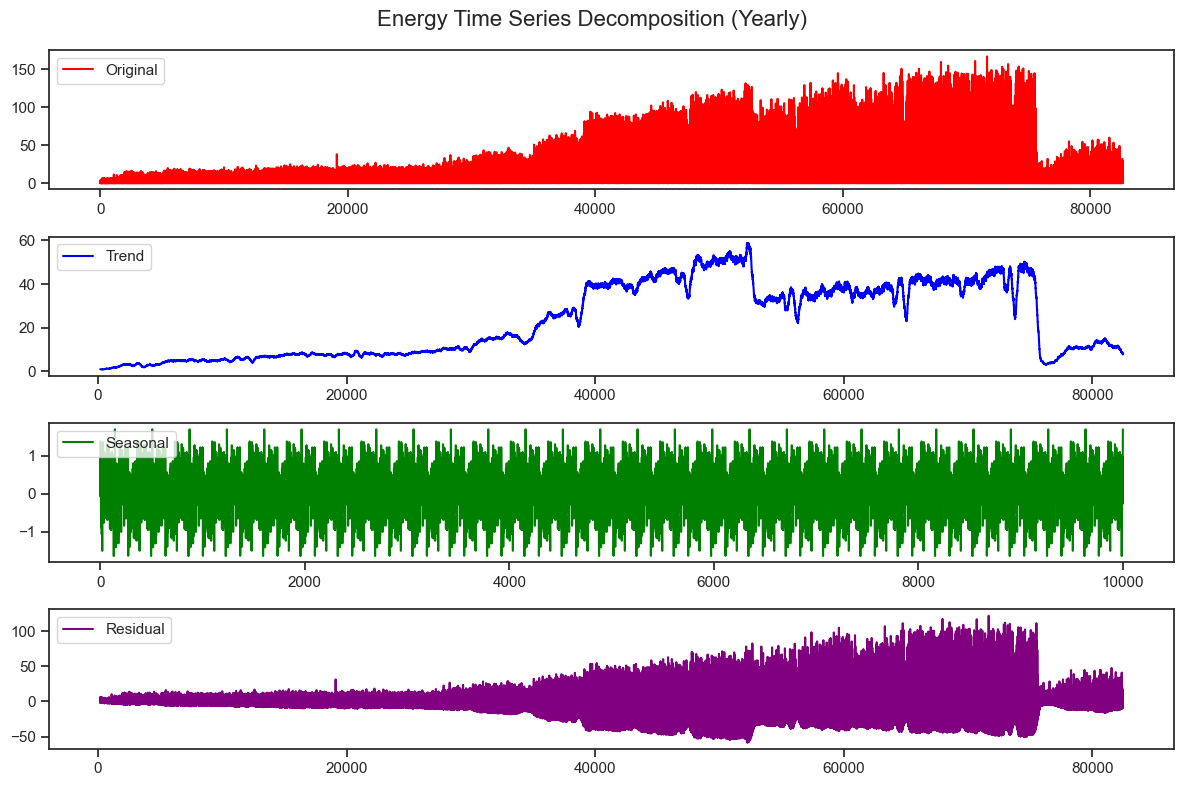

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load your time series data into a DataFrame
# Make sure the index is a datetime index
data = pd.read_csv("../Dataset/Processed/palo_alto_data_with_zero.csv")

# Select the 'Energy' column
energy_series = data['Energy']

# Perform time series decomposition
decomposition = seasonal_decompose(energy_series, model='additive', period=365)  # Assuming yearly seasonality

# Plot the decomposition
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(energy_series, label='Original', color='red')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='blue')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal[:10000], label='Seasonal', color='green')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual', color = 'purple')
plt.legend(loc='upper left')

plt.suptitle('Energy Time Series Decomposition (Yearly)', fontsize=16)
plt.tight_layout()
plt.savefig("../Results/eda/decom.png")
plt.show()
